`기초 통계분석`
- 회귀분석
    - 독립변수들이 종속변수에 미치는 영향을 파악하는 분석방법
        - 독립변수: 원인을 나타내는 변수 (x)
        - 종속변수: 결과를 나타내는 변수 (y)
        - 잔차: 계산값과 예측값의 차이 (오차와 비슷)
            - 실제값(y): 데이터에서 관측된 값(즉, 현실에서 얻은 값).
            - 예측값(ŷ): 회귀 모델이 독립변수를 바탕으로 계산해서 내놓은 값(즉, 모델이 예측한 값).
                - 잔차(residual) = 실제값(y) - 예측값(ŷ)
                - 잔차가 클수록 모델의 예측이 실제 값과 많이 차이 난다는 뜻이고, 작을수록 모델이 잘 예측했다고 볼 수 있어요.
        - 회귀방정식: y집값 = w1x수도권거리 + w2평수 + ... + 베타
            - w: 독립변수가 y에 얼마나 영향을 미치는지 나타내는 기울기(회귀계수).
            - 베타(β): 모든 독립변수가 없는 상태(독립변수 값이 0일 때)에서 y가 가질 수 있는 값(기본값)
                - 베타는 모델의 기본값 역할을 하며, 회귀선을 위아래로 이동시키는 역할을 해요.
    - 회귀계수 추정방법
        - 최소제곱법(최소자승법, Least Squares Method): 잔차의 제곱합(SSE)이 최소가 되는 회귀계수와 절편을 구하는 방법
            - 회귀 분석에서는 데이터를 가장 잘 설명하는 직선을 찾는 것이 목표입니다.
            - 그런데 여러 개의 데이터가 있으면 모든 점을 완벽하게 지나는 직선을 찾기는 어렵죠.
            - 그래서 잔차(Residual, 실제 값과 예측 값의 차이)의 제곱합(SSE, Sum of Squared Errors)이 최소가 되도록 회귀 계수를 결정하는 방법이 최소제곱법입니다.
            - 즉, 오차를 최소화하는 회귀식을 찾는 방법이죠!
                - 제곱합 하는 건 sse+ssr하면 부호가 달라서 상쇄돼서다.
                - 이차함수 그려서 가장 낮은 곳 찾는다.
    - 회귀모형 평가
        - R-squre: 총 변동 중에서 회귀모형에 의해 설명되는 변동이 차지하는 비율 (0~1)
            - SST: 전체의 변동
            - SSE: 모형에 의해 설명되지 않는 변동
            - SSR: 모형에 의해 설명되는 변동
            - R제곱=SSR/SST=1-(SSE/SST)
    - 회귀모형 평가 (R-제곱, R-squared)
        - 회귀 분석이 얼마나 데이터를 잘 설명하는지를 평가하는 지표가 R-제곱(R²)입니다.  
        - 이 값은 0에서 1 사이의 값을 가지며, 1에 가까울수록 회귀 모형이 데이터를 잘 설명하는 것이죠.
        - SST (Sum of Squares Total): 데이터의 총 변동량 (전체 데이터의 분산)
            - SST는 전체 데이터의 변동량을 나타내므로, 항상 0 이상입니다.
            - 데이터가 변동이 없으면 SST는 0이 됩니다. (즉, 모든 데이터가 동일한 값을 가진다면 변동이 없기 때문에 SST = 0)
            - 일반적으로 SST는 데이터의 크기에 따라 달라지며, 특정한 최대값이 정해져 있지는 않습니다.
        - SSE (Sum of Squared Errors): 회귀 모형이 설명하지 못한 변동량 (잔차의 제곱합)
            - SSE는 회귀 모형이 설명하지 못한 변동량(잔차의 제곱합)입니다.
            - SSE도 항상 0 이상입니다.
            - 만약 모든 데이터가 완벽하게 회귀 모형에 맞다면 오차가 없으므로 SSE = 0입니다. (즉, 완벽한 예측이 가능하면 SSE는 0)
            - 실제 분석에서는 SSE가 작을수록 좋은 회귀 모형이라고 볼 수 있습니다.
        - SSR (Sum of Squares Regression): 회귀 모형이 설명하는 변동량
            - SSR은 회귀 모형이 설명할 수 있는 변동량입니다.
            - SSR도 항상 0 이상입니다.
            - SST = SSR + SSE 이므로, SSR의 최대값은 SST입니다. (즉, 회귀 모형이 모든 변동을 완벽하게 설명하면 SSR = SST)
        - R^2 = SSR / SST = 1 - (SSE / SST)
            - 쉽게 말해 R² 값이 높을수록 회귀 모형이 데이터를 잘 설명한다는 의미입니다.
            - 예를 들어 R² = 0.85이면, 회귀 모형이 전체 변동의 85%를 설명하고 있다는 뜻이에요.
        - 정리하면, SST ≥ SSR ≥ 0 그리고 SST ≥ SSE ≥ 0 입니다.
            - R² 값이 높을수록 SSE가 작아지고 SSR이 커지므로, 모델이 데이터를 더 잘 설명하는 것이죠.

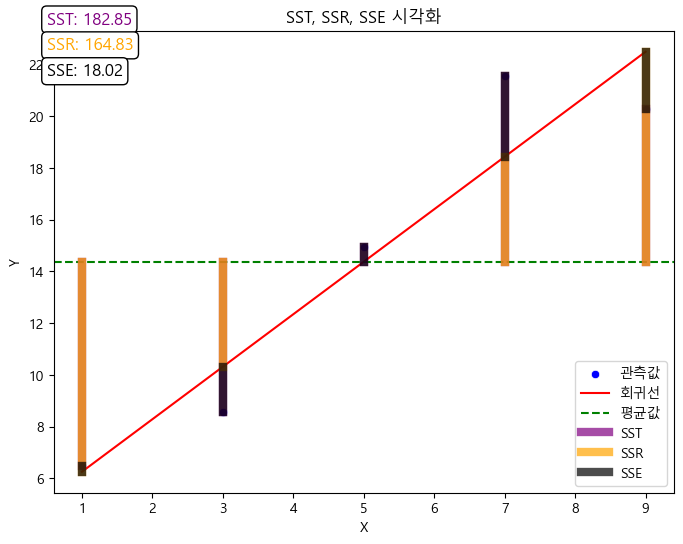

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 'Malgun Gothic' 또는 'NanumGothic')
plt.rc('font', family='Malgun Gothic')  # Windows의 경우

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 폰트 확인
fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 샘플 데이터 생성 (관측값 개수를 줄임)
np.random.seed(42)
x = np.array([1, 3, 5, 7, 9])  # x 값 (적은 개수)
y = 2 * x + 3 + np.random.normal(0, 3, len(x))  # y 값
mean_y = np.mean(y)  # 평균값

# 회귀 모델 적합
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# SST, SSR, SSE 계산
SST = np.sum((y - mean_y) ** 2)
SSR = np.sum((y_pred - mean_y) ** 2)
SSE = np.sum((y - y_pred) ** 2)

# 그래프 설정
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, color='blue', label='관측값')  # 실제 데이터 점
plt.plot(x, y_pred, color='red', label='회귀선')  # 회귀선
plt.axhline(mean_y, color='green', linestyle='--', label='평균값')  # 평균선

# SST, SSR, SSE 시각화 (굵은 색깔 막대)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], mean_y], color='purple', linewidth=6, alpha=0.7, label='SST' if i == 0 else "")  # SST
    plt.plot([x[i], x[i]], [y_pred[i], mean_y], color='orange', linewidth=6, alpha=0.7, label='SSR' if i == 0 else "")  # SSR
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='black', linewidth=6, alpha=0.7, label='SSE' if i == 0 else "")  # SSE

# 변동량 별도 박스 추가
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
plt.text(0.5, max(y) + 2, f"SST: {SST:.2f}", fontsize=12, color="purple", bbox=bbox_props)
plt.text(0.5, max(y) + 1, f"SSR: {SSR:.2f}", fontsize=12, color="orange", bbox=bbox_props)
plt.text(0.5, max(y), f"SSE: {SSE:.2f}", fontsize=12, color="black", bbox=bbox_props)

plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("SST, SSR, SSE 시각화")
plt.show()

- SST는 전체 변동량을 나타내는데, 이것은 SSE(잔차 변동)와 SSR(회귀 모델이 설명한 변동)의 합과 같아요.
    - 공식으로 표현하면 SST = SSR + SSE
        - 이 의미는 회귀 분석에서 데이터의 총 변동량(SST)은 회귀 모형이 설명할 수 있는 변동량(SSR)과 설명하지 못한 오차(SSE)로 나눌 수 있다는 거죠.
        - 그래프에서도 SST 막대가 SSE와 SSR 막대를 합친 것처럼 표현되었을 거예요!
    - 실제로 R² 값도 R^2 = SSR/SST = 1 - (SSE/SST)로 계산되므로,
        - SSE가 작아질수록 SSR이 커지고 회귀 모델의 설명력이 높아진다는 의미입니다.
- 평균값(Mean, 바y)
    - 평균값은 전체 관측값의 중심을 나타내는 지표예요.  
        - 쉽게 말해 데이터의 일반적인 경향을 보여주는 값이라고 할 수 있어요.
        - 즉, 모든 관측값 y의 합을 데이터 개수 n으로 나눈 값입니다.
    - 평균값은 단순한 대표값이지만, 데이터의 개별 변화는 고려하지 않아요.
        - 회귀 분석에서는 SST(총 변동량)를 계산할 때 기준 값으로 사용돼요.
-회귀선(Regression Line)
    - 회귀선은 주어진 데이터에 가장 잘 맞는 직선을 뜻해요.
        - 데이터의 패턴을 설명하는 공식이라고 생각하면 됩니다.  
    - 회귀선의 수식: y = beta_0 + beta_1*x
        - beta_0: 절편(Intercept) → x=0일 때의 y 값
        - beta_1: 기울기(Slope) → x가 증가할 때 y가 얼마나 변하는지 나타냄
- 회귀선의 역할
    - 데이터의 경향을 설명 → 평균값보다 더 정교하게 변수 간 관계를 설명.
    - 예측에 사용 → 새로운 x 값이 주어졌을 때 y 값을 예측하는 데 사용.
    - SSR(설명된 변동량) 계산에 사용 → 평균값과 비교해 데이터를 더 잘 설명하는지 평가.
- 평균값과 회귀선의 차이점

| | 평균값 | 회귀선 |
|------|------------------|------------------|
| 정의 | 전체 데이터의 중심 | 데이터의 패턴을 따르는 최적의 직선 |
| SST와 관계 | SST 계산 기준값 | SSR과 SSE 계산에 활용 |
| 예측 가능 여부 | 데이터의 대표값일 뿐 예측 불가 | 새로운 값이 들어오면 예측 가능 |

- 우리가 커피 소비량과 집중력을 분석하고 있다고 가정해볼게요.
    - 5명의 사람들이 하루 동안 커피를 다른 양만큼 마셨고, 그들의 집중력 점수를 조사했어요.
- 평균값
    - 먼저, 모든 사람의 집중력 점수를 평균 내면 전체 데이터의 중심값이 나와요.
    - 즉, "이 그룹의 평균적인 집중력은 어느 정도일까?"를 보여주는 값이에요.
- 회귀선
    - 데이터를 분석해보니, 커피를 많이 마실수록 집중력이 높아지는 경향이 보여요.
    - 그래서 가장 잘 맞는 직선을 찾아서, "커피 잔 수가 몇 개일 때 집중력은 몇 점 정도 될까?"를 예측할 수 있도록 만든 게 회귀선이에요.
    - 이 직선은 개별 데이터보다 좀 더 일반적인 경향을 반영한 거죠.
- SST (총 변동량)
    - 각 사람들의 집중력 점수가 평균값과 얼마나 차이가 나는지를 계산한 거예요.
    - 이 값은 전체 데이터가 평균값을 기준으로 얼마나 퍼져 있는지를 의미해요.
    - 즉, 모든 점수를 평균값과 비교해서 얼마나 달라지는지 보는 것!
- SSR (설명된 변동량)
    - 이제 평균 대신 회귀선을 기준으로 데이터를 설명하는 방식을 생각해볼게요.
    - 회귀선은 데이터를 좀 더 정교하게 분석해서, 커피가 집중력에 영향을 준다는 부분을 설명하는 역할을 해요.
    - 즉, 평균보다 더 정확한 방법으로 데이터의 변동을 설명하는 것이 SSR이에요.
- SSE (오차 변동량)
    - 하지만 회귀선도 완벽한 예측을 하지는 못해요.
    - 각 사람의 실제 집중력 점수와 회귀선이 예측한 값 사이에 차이(오차)가 발생할 수 있어요.
    - 예를 들어, 같은 커피를 마셨더라도 어떤 사람은 더 피곤할 수도 있고, 컨디션이 다를 수도 있어요.
    - 이렇게 회귀선이 설명하지 못한 변동량이 SSE예요.
- SST(총 변동량) = 모든 데이터가 평균값과 얼마나 차이가 나는지
- SSR(설명된 변동량) = 평균보다 더 정교한 회귀선이 설명하는 부분
- SSE(오차 변동량) = 회귀선이 설명하지 못한 부분 (예측 오차)
- 그리고, SST는 SSR과 SSE의 합으로 계산돼요. 즉, 전체 변동량 = 회귀선이 설명한 부분 + 설명하지 못한 부분이에요!

- SSR(설명된 변동량) → 평균 대신 회귀선에 더 가까운 값을 사용해서 변동을 설명하는 부분.  
    -  즉, 평균보다 더 정확하게 데이터를 설명하려고 하는 과정에서 생기는 변동량이에요.  
- SSE(오차 변동량) → 회귀선이 예측한 값과 실제 관측값 사이의 차이를 나타내는 부분.  
    -  즉, 회귀선이 완벽하지 않기 때문에 실제 값과 차이가 생기는 부분이 SSE예요.  
- 그래서 전체 변동량(SST)은 SSR(설명된 부분)+SSE(오차 부분)으로 나뉘는 거죠!